In [133]:
import ROOT
import numpy as np
import uproot3
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy
import time

In [134]:
root_file = "dav10.root"
file = uproot3.open(root_file)
file.keys()

[b'Truth_Vertex_PV_Selected;6',
 b'Truth_Vertex_PV_Selected;5',
 b'Reco_Vertex;4',
 b'Reco_Vertex;3',
 b'amvf;1']

In [135]:
tree_truth = file['Truth_Vertex_PV_Selected;6']
tree_reco = file['Reco_Vertex;4']

In [136]:
branches_truth = tree_truth.arrays(namedecode='utf-8')
branches_reco = tree_reco.arrays(namedecode='utf-8')
branches_truth.keys(), branches_reco.keys()

(dict_keys(['event_id', 'truth_vtx_vx', 'truth_vtx_vy', 'truth_vtx_vz', 'truth_particle_Id', 'truth_particle_Type', 'truth_particle_process', 'truth_particle_vx', 'truth_particle_vy', 'truth_particle_vz', 'truth_particle_vt', 'truth_particle_p', 'truth_particle_px', 'truth_particle_py', 'truth_particle_pz', 'truth_particle_m', 'truth_particle_q', 'truth_particle_eta', 'truth_particle_phi', 'truth_particle_pt', 'truth_particle_vertexPrimary', 'truth_particle_vertexSecondary', 'truth_particle_particle', 'truth_particle_generation', 'truth_particle_subParticle', 'truth_vtx_fitted_trk_d0', 'truth_vtx_fitted_trk_z0', 'truth_vtx_fitted_trk_phi', 'truth_vtx_fitted_trk_theta', 'truth_vtx_fitted_trk_qp', 'truth_vtx_fitted_trk_time', 'truth_vtx_fitted_trk_err_d0', 'truth_vtx_fitted_trk_err_z0', 'truth_vtx_fitted_trk_err_phi', 'truth_vtx_fitted_trk_err_theta', 'truth_vtx_fitted_trk_err_qp', 'truth_vtx_fitted_trk_err_time', 'truth_vtx_fitted_trk_vtxID']),
 dict_keys(['event_id', 'reco_vtx_vx', 're

## vz distribution

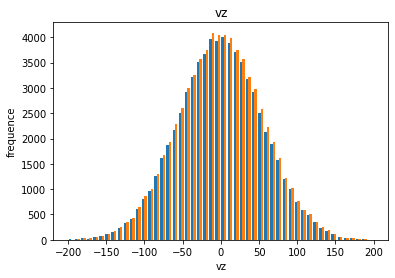

In [137]:
plt.hist([branches_truth['truth_vtx_vz'].flatten(), 
          branches_reco['reco_vtx_vz'].flatten()]  , bins=50, range=(-200, 200))
#, bins=100, range=(0, 100), histtype='step', label='number of vertex'
plt.title('vz')
plt.xlabel('vz')
plt.ylabel('frequence')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Truth Match Fraction

In [138]:
# define variables
event_size = 10000
truth_d0, truth_z0, truth_phi, truth_theta, truth_qp, truth_trk_vtxid = branches_truth['truth_vtx_fitted_trk_d0'], branches_truth['truth_vtx_fitted_trk_z0'], branches_truth['truth_vtx_fitted_trk_phi'], branches_truth['truth_vtx_fitted_trk_theta'], branches_truth['truth_vtx_fitted_trk_qp'], branches_truth['truth_vtx_fitted_trk_vtxID']
reco_d0, reco_z0, reco_phi, reco_theta, reco_qp, reco_trk_vtxid  = branches_reco['reco_vtx_fitted_trk_d0'], branches_reco['reco_vtx_fitted_trk_z0'], branches_reco['reco_vtx_fitted_trk_phi'], branches_reco['reco_vtx_fitted_trk_theta'], branches_reco['reco_vtx_fitted_trk_qp'], branches_reco['reco_vtx_fitted_trk_vtxID']

In [139]:
start = time.time()

truth_trk_info, reco_trk_info, truth_match_matrix = [], [], []

# reshape the data into shape(:, 5)
for i in range(event_size):
    num_trk_truth = np.bincount(truth_trk_vtxid[i])
    truth_trk_info_tmp = np.vstack([truth_d0[i], truth_z0[i], truth_phi[i], truth_theta[i], truth_qp[i]]).transpose()
    truth_trk_info_tmp = np.split(truth_trk_info_tmp, np.cumsum(num_trk_truth))
    truth_trk_info_tmp = truth_trk_info_tmp[:-1]
    truth_trk_info.append(truth_trk_info_tmp)
    
    num_trk_reco = np.bincount(reco_trk_vtxid[i])
    reco_trk_info_tmp = np.vstack([reco_d0[i], reco_z0[i], reco_phi[i], reco_theta[i], reco_qp[i]]).transpose()
    reco_trk_info_tmp = np.split(reco_trk_info_tmp, np.cumsum(num_trk_reco))
    reco_trk_info_tmp = reco_trk_info_tmp[:-1]
    reco_trk_info.append(reco_trk_info_tmp)
    
    match_matrix = np.zeros((len(truth_trk_info_tmp), len(reco_trk_info_tmp)))
    for j in range(len(truth_trk_info_tmp)):
        for k in range(len(reco_trk_info_tmp)):
            match_matrix[j, k] = len([x for x in set(tuple(x) for x in truth_trk_info_tmp[j]) & set(tuple(x) for x in reco_trk_info_tmp[k])])/len(truth_trk_info_tmp[j])
            
    truth_match_matrix.append(match_matrix)

    

end = time.time()
print(end-start, 'seconds')

39.18472409248352 seconds


mean_event= 0.9934409229049306
standard deviation_event= 0.027140979659441435


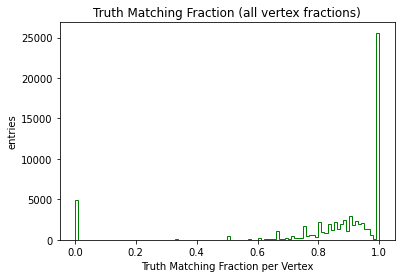

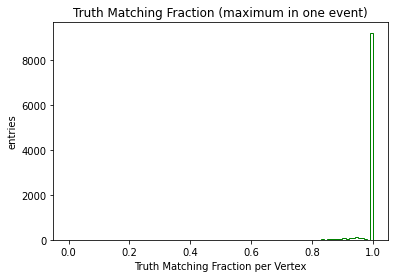

time_elapsed 1.0858008861541748 seconds


In [140]:
time_start = time.time()
fig_vtx, ax_vtx = plt.subplots()
fig_event, ax_event = plt.subplots()

m_event, m_vtx = [], []
for l in range(len(truth_match_matrix)):
    m_event.append(np.amax(truth_match_matrix[l]))
    for j in range(len(truth_match_matrix[l])):
        m_vtx.append(max(truth_match_matrix[l][j]))
        
(mean, stadev) = norm.fit(m_event)
print('mean_event=', mean)
print('standard deviation_event=', stadev)
bin = np.linspace(0, 1, 101)
ax_event.hist(m_event, bins=bin, color='green', histtype='step', label='number of vertex')
ax_vtx.hist(m_vtx, bins=bin, color='green', histtype='step')

ax_event.set_title('Truth Matching Fraction (maximum in one event)')
ax_vtx.set_title('Truth Matching Fraction (all vertex fractions)')

ax_event.set_xlabel("Truth Matching Fraction per Vertex")
ax_event.set_ylabel("entries")

ax_vtx.set_xlabel("Truth Matching Fraction per Vertex")
ax_vtx.set_ylabel("entries")

plt.show()
time_elapsed = (time.time() - time_start)
print('time_elapsed', time_elapsed, 'seconds')

In [141]:
def array_row_intersection(a,b):
    tmp=np.prod(np.swapaxes(a[:,:,None],1,2)==b,axis=2)
    return a[np.sum(np.cumsum(tmp,axis=0)*tmp==1,axis=1).astype(bool)]
start = time.time()

# define variables
truth_match_matrix = []

# reshape the data into shape(:, 5)
for i in range(event_size):
    num_trk_truth = np.bincount(truth_trk_vtxid[i])
    truth_trk_info_tmp = np.vstack([truth_d0[i], truth_z0[i], truth_phi[i], truth_theta[i], truth_qp[i]]).transpose()
    truth_trk_info_tmp = np.split(truth_trk_info_tmp, np.cumsum(num_trk_truth))
    truth_trk_info_tmp = truth_trk_info_tmp[:-1]
    
    
    num_trk_reco = np.bincount(reco_trk_vtxid[i])
    reco_trk_info_tmp = np.vstack([reco_d0[i], reco_z0[i], reco_phi[i], reco_theta[i], reco_qp[i]]).transpose()
    reco_trk_info_tmp = np.split(reco_trk_info_tmp, np.cumsum(num_trk_reco))
    reco_trk_info_tmp = reco_trk_info_tmp[:-1]

    
    match_matrix = np.zeros((len(truth_trk_info_tmp), len(reco_trk_info_tmp)))
    for j in range(len(truth_trk_info_tmp)):
        for k in range(len(reco_trk_info_tmp)):
            match_matrix[j, k] = len(array_row_intersection(truth_trk_info_tmp[j], reco_trk_info_tmp[k]))/len(truth_trk_info_tmp[j])
            
    truth_match_matrix.append(match_matrix)

    
end = time.time()
print(end-start, 'seconds')

27.50849723815918 seconds


mean_event= 0.9934409229049306
standard deviation_event= 0.027140979659441435


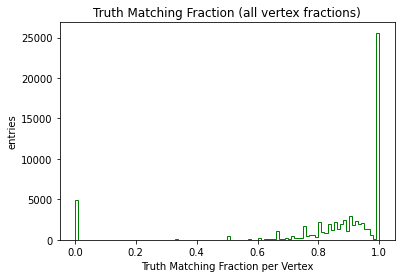

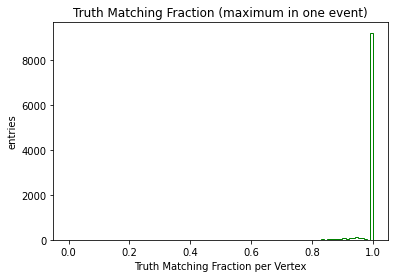

time_elapsed 1.0085299015045166 seconds


In [142]:
time_start = time.time()
fig_vtx, ax_vtx = plt.subplots()
fig_event, ax_event = plt.subplots()

m_event, m_vtx = [], []
for l in range(len(truth_match_matrix)):
    m_event.append(np.amax(truth_match_matrix[l]))
    for j in range(len(truth_match_matrix[l])):
        m_vtx.append(max(truth_match_matrix[l][j]))
        
(mean, stadev) = norm.fit(m_event)
print('mean_event=', mean)
print('standard deviation_event=', stadev)
bin = np.linspace(0, 1, 101)
ax_event.hist(m_event, bins=bin, color='green', histtype='step', label='number of vertex')
ax_vtx.hist(m_vtx, bins=bin, color='green', histtype='step')

ax_event.set_title('Truth Matching Fraction (maximum in one event)')
ax_vtx.set_title('Truth Matching Fraction (all vertex fractions)')

ax_event.set_xlabel("Truth Matching Fraction per Vertex")
ax_event.set_ylabel("entries")

ax_vtx.set_xlabel("Truth Matching Fraction per Vertex")
ax_vtx.set_ylabel("entries")

plt.show()
time_elapsed = (time.time() - time_start)
print('time_elapsed', time_elapsed, 'seconds')

In [143]:
def dist_cal(list1, list2):
    dist = np.sqrt((list1[0]-list2[0])**2 + (list1[1]-list2[1])**2 + (list1[2]-list2[2])**2)
    return dist

def print_out(list1, list2):
    print("diff_x:", list1[0]-list2[0], "diff_y", list1[1]-list2[1], "diff_z", list1[2]-list2[2])
    
def array_row_intersection(a,b):
    tmp=np.prod(np.swapaxes(a[:,:,None],1,2)==b,axis=2)
    return a[np.sum(np.cumsum(tmp,axis=0)*tmp==1,axis=1).astype(bool)]

In [144]:
truth_vx, truth_vy, truth_vz = branches_truth['truth_vtx_vx'], branches_truth['truth_vtx_vy'], branches_truth['truth_vtx_vz']
reco_vx, reco_vy, reco_vz = branches_reco['reco_vtx_vx'], branches_reco['reco_vtx_vy'], branches_reco['reco_vtx_vz']

truth_vtx_info, reco_vtx_info = [], []
for i in range(event_size):
    
    truth_vtx_i = np.vstack([truth_vx[i], truth_vy[i], truth_vz[i]]).transpose()
    reco_vtx_i = np.vstack([reco_vx[i], reco_vy[i], reco_vz[i]]).transpose()
    
    truth_vtx_info.append(truth_vtx_i)
    reco_vtx_info.append(reco_vtx_i)

# Reconstruction Efficiency
### To successfully reconstruct a HS, 1 test is done: 
 - |reco(max(associated number of tracks)) - truth_HS| < 0.1 mm
 
### Local pile-up density
 - local pile-up density near a vertex, defined as the number of generated vertices per unit length within a symmetrical ±2 mm longitudinal window

/tmp/ipykernel_40/298881917.py:43: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  TEff.Fill(Reco, localPUDensity_i)


time_elapsed: 5.885699272155762 seconds
time_local: 9.951519966125488e-05 seconds
time_prepare: 8.78162145614624e-05 seconds
time_reco: 0.0005571381330490113 seconds
time_reco: 2.9012656211853027e-05 seconds
time_fill: 1.600954532623291e-05 seconds


Warning in <TCanvas::Constructor>: Deleting canvas with same name: fillhist


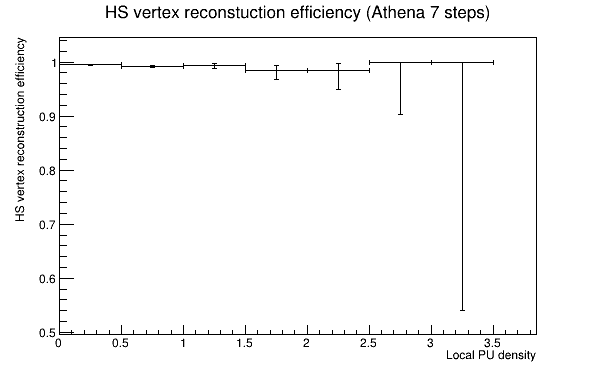

In [145]:
time_start = time.time()
c = ROOT.TCanvas("fillhist", "title1", 600, 400)
TEff = ROOT.TEfficiency("eff", "HS vertex reconstuction efficiency (Athena 7 steps);Local PU density;HS vertex reconstruction efficiency", 7, 0, 3.5)

sel_loop, suc_recoed_vtx, localPUDensity = [], [], []
long_window = 2
for i in range(event_size):
    
    # localPUDensity
    long_dist = truth_vz[i]
    long_dist = [np.abs(long_dist[a]-b) for a in range(len(long_dist)) for b in long_dist[a+1:]] # find the difference between each two vertices
    nVtxInWindow = len([a for a in long_dist if a < long_window]) # eliminate any greater than long_window
    
    localPUDensity_i = nVtxInWindow/long_window
    localPUDensity.append(localPUDensity_i)
    
    # Prepare the data
    truth_HStrk = truth_trk_info[i][0] # Hard Scatter truth vertex is the first vertex in the event.
    reco_trk_i = reco_trk_info[i]
    truth_vtx_i = np.vstack([truth_vx[i], truth_vy[i], truth_vz[i]]).transpose()
    reco_vtx_i = np.vstack([reco_vx[i], reco_vy[i], reco_vz[i]]).transpose().tolist() # had to convert to list so that it can "zip and sorted"
    truth_HSvtx = truth_vtx_i[0]
    
    #Reco Test
    num_trk_associated = []

    for k in range(len(reco_trk_i)):
        # trk_common = [a for a in trk_reco[i][j] if a in trk_truth[i][j]]
        num_trk_associated.append(len(array_row_intersection(truth_HStrk, reco_trk_i[k])))
        
    
    num_trk_associated, reco_vtx_i = zip(*sorted(zip(num_trk_associated, reco_vtx_i), reverse=True))
    bestRecoHSvtx_truth = reco_vtx_i[0]
    suc_recoed_vtx.append(bestRecoHSvtx_truth)
    
    hs_dist = dist_cal(truth_HSvtx, bestRecoHSvtx_truth)
    
    # save the successfully reco-ed event ID
    if hs_dist <= 0.1:
        sel_loop.append(i)

    Reco = hs_dist <= 0.1 
    TEff.Fill(Reco, localPUDensity_i)
    
TEff.Draw()
c.Draw()

time_elapsed = (time.time() - time_start)
print('time_elapsed:',time_elapsed, 'seconds')
print('time_local:', sum(pu)/event_size, 'seconds')
print('time_prepare:', sum(data)/event_size, 'seconds')
print('time_reco:', sum(re)/event_size, 'seconds')
print('time_reco:', sum(re2)/event_size, 'seconds')
print('time_fill:', sum(fil)/event_size, 'seconds')

# Selection Efficiency
### To successfully selection, 1 test is done: 
 - Reconstructed Vertex with max(PT^2) = [max(associated number of tracks) - HS <= 0.1]
 
#### sidenotes: ATLAS definition - the reconstructed vertex with highest pT2 is the one containing the largest total weight from true HS tracks.
 - don't have a truth track weight output

Warning in <TCanvas::Constructor>: Deleting canvas with same name: fillhist


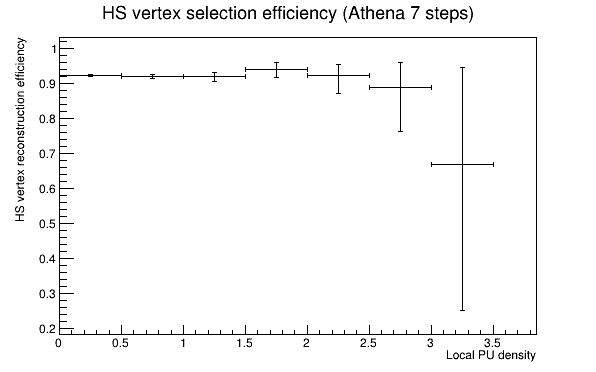

In [146]:
time_start = time.time()
c = ROOT.TCanvas("fillhist", "title", 600, 400)
#c.SetFillStyle(1001)
TEff = ROOT.TEfficiency("eff", "HS vertex selection efficiency (Athena 7 steps);Local PU density;HS vertex reconstruction efficiency", 7, 0, 3.5)
long_window = 2
for i in sel_loop:
    
    #Prepare the data
    localPUDensity_i = localPUDensity[i]
    
    reco_vtx_i = np.vstack([reco_vx[i], reco_vy[i], reco_vz[i]]).transpose().tolist()
    num_trk_reco = np.bincount(reco_trk_vtxid[i])
    pt = np.split((1/(np.abs(reco_qp[i])) * np.sin(reco_theta[i])) ** 2, np.cumsum(num_trk_reco))
    pt = [sum(i) for i in pt[:-1]]
    reco_HSvtx = reco_vtx_i[pt.index(max(pt))]
    
    bestRecoHSvtx_truth = suc_recoed_vtx[i]
    
    #Sel Test

    Sel = bestRecoHSvtx_truth == reco_HSvtx
    TEff.Fill(Sel, localPUDensity_i)

TEff.Draw()
c.Draw()